Load library


In [4]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf

Load Data

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [7]:
class_labels = ["T-shirt","Trouser","Pullover","Dress","Coat","Sandle","Shirt","Sneaker","Bag","Ankle Boot"]

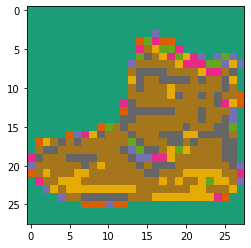

In [9]:
plt.imshow(X_train[0], cmap = "Dark2")

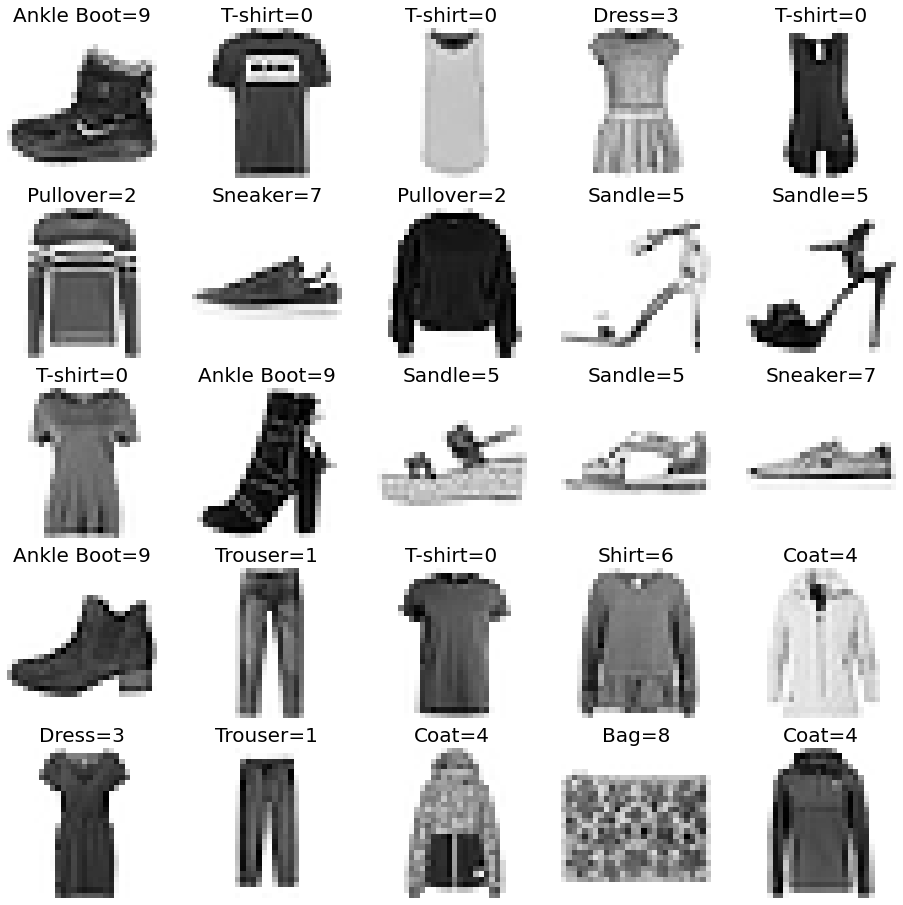

In [10]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i],cmap="Greys")
  plt.axis('off')
  plt.title(class_labels[y_train[i]]+"="+str(y_train[i]),fontsize=20)

In [11]:
X_train =  X_train/255

X_test = X_test/255


In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

BUILD NEURAL NETWORK

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(units = 32, activation = 'relu'),
    keras.layers.Dense(units = 10, activation = 'softmax')


    
    
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [21]:
from keras.backend import sparse_categorical_crossentropy
model.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None
)

In [23]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3805 - accuracy: 0.8652
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3595 - accuracy: 0.8705
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3422 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3313 - accuracy: 0.8814
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3207 - accuracy: 0.8836
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3134 - accuracy: 0.8870
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3059 - accuracy: 0.8886
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2987 - accuracy: 0.8901
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2926 - accuracy: 0.8931
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.287

Model Evaluate

In [24]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3801 - accuracy: 0.8666


[0.3801160752773285, 0.866599977016449]

In [25]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [26]:
y_pred[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.16, 0.  , 0.82],
      dtype=float32)

In [27]:
np.argmax(y_pred[0].round(2))

9

In [28]:
y_test[0]

9

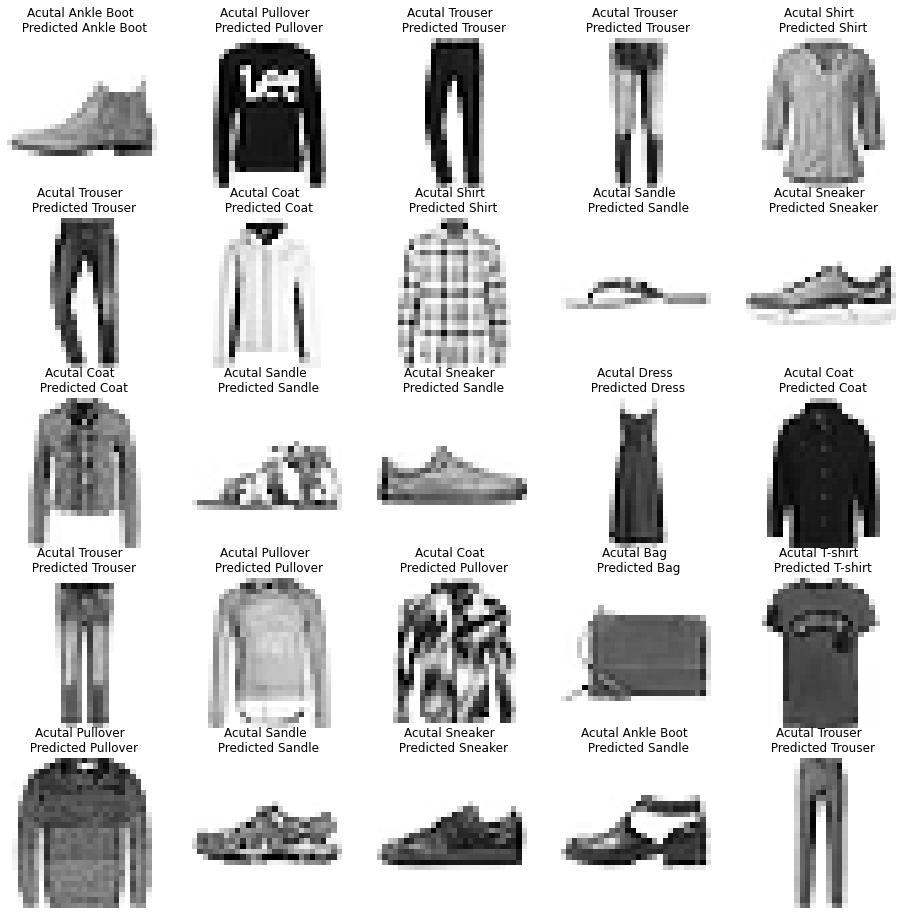

In [30]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i],cmap="Greys")
  plt.axis('off')
  plt.title("Acutal {} \n Predicted {}".format(class_labels[y_test[i]], class_labels[np.argmax(y_pred[i])]))

Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, [np.argmax(i) for i in y_pred])

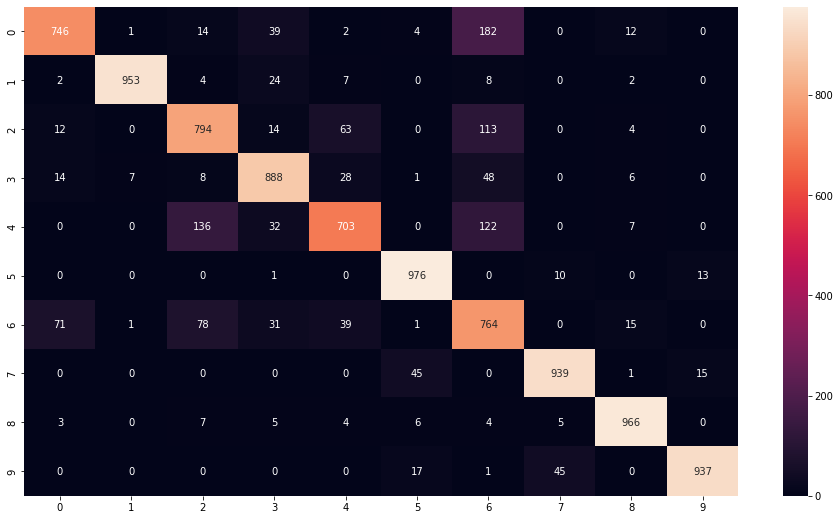

In [33]:
plt.figure(figsize=(16,9))
sns.heatmap(cm, annot = True, fmt = "d")

Save Model

In [34]:
model.save("Fashion_Classification.h5")